# Project1

The bank robber algorithm

--------------

You are a bank robber who's looking to rob as many banks in a day before you flee the country.

You got your hands on a list of banks in the area, with their location, the amount of money they have and the time they will take to rob. It looks like this:

```
id, x_coordinate, y_coordinate, money, time (hr)
0, 11.4, 3.3, 5000, 0.6
1, 6.9, 7.1, 15000, 0.3
2, 1.4, 13.2, 900, 1.1
```

This list of banks is in `bank_data.csv`

You have **24 hours** to make as much money as possible then escape.

# Rules:

- Your run can start anywhere on the map but it has to end at the **helicopter escape zone**: coordinates (0,0)
    - If you try to rob too many banks and can't get to the helicopter in 24 hours, you get caught and go to jail.

- You solution is a list or array of integers (eg. `[580, 433, 24, 998]`) where the numbers are the IDs of each banks. The ID of each bank is their index (their row index).

- You travel between banks at 30 km/h. You have to travel from one bank to the next!
    - Remember the formula to calculate the distance between two points.
    - The coordinates are in kilometers.
        - So (1, 1) and (1, 2) are one kilometer apart. 
        - This would take 1 / 30 hour = 2 minutes to travel

- Your solution should be an approximative/heuristic algorithm
    - This problem is NP-Hard, you won't find a fast enough algorithm that has the perfect solution
    - It doesn't need to find the best solution
    - Find the best solution you can!

- Your solution has to run on a common laptop in under 3 minutes for the 10,000 cities dataset
    - You can use everything you want to achieve this:
        - Use numpy, pandas, functions, algorithms
        - You can use parallelism
        - Use optimied libraries (pandas, numba, scipy, etc.)
    - Test your code on **small subsets** of the data so they run fast
        - Then scale your code up to bigger chunks of the data

- Your input is a pandas dataframe with the bank data. Your output is a list of bank IDs in order that you rob them:

**Ex:**

```
df = pd.read_csv('bank_data.csv')
robber_algorithm(df)

# Output is a list of bank IDs
[OUTPUT] --> [664, 2341, 26, 998, 9583, 24, 1, 444, 6783]
```

# Checking Your Solution:

You can use the `check_solution` function from `check_solution.py` to test if your solution is valid and verify the score.

# Hints:

- Most of the design paradigms we saw in class will work for this:
    - Divide-and-conquer
    - Brute Force
    - Greedy Algorithm
    - Dynamic Programming
    - Backtracking
    - Breadth-first & Depth-first search
    - Some we haven't seen:
        - Branch & Bound
        - Prune & Search
 
 Start with something that's easier (brute-force or greedy algorithm) and then work towards a better design once it works.
 
 - Because there are too many banks at each step, you will need to select only some candidates to explore
 
 - If you find yourself doing many **Nearest neighbors** type queries, consider using a [KD-Tree](https://en.wikipedia.org/wiki/K-d_tree) or a Ball Tree to speed it up.
     - There are good implementations of KD-Trees and nearest neighbours in scipy, sklearn and [this library](https://github.com/lmcinnes/pynndescent)

- You can work your algorithm backwards (starting at the end and backing up to the starting point) or forwards (finding a starting point and looping until there is no time left). They will lead to different designs however


In [1]:
import pandas as pd
import math
import numpy as np
from check_solution import check_solution

data = pd.read_csv("bank_data.csv",)
df = pd.DataFrame(data)


In [2]:
df['weight'] = (df['money'] / df['time (hr)'] )
#df['to_h'] = (math.dist  ((df['x_coordinate'],df['y_coordinate']),(0,0)))

df['to_h'] = np.sqrt((df['x_coordinate'])**2+(df['y_coordinate'])**2)/30
df['weight_new'] = (df['money'] / (df['time (hr)'] + df['to_h']) )
df['robbed'] = 'no'

In [3]:
dfs=df.sort_values(by=['weight_new'],ascending=False)

In [9]:
#check distance between  previous an current bank
prev_x=0
prev_y=0
tot_money = 0
tot_time = 0
target_hours = 24
to_h = 0
cp = 15
a_to_b_time = 1
travel_list  = []
for (k, column) in dfs.iterrows():
    if math.dist  ((prev_x,prev_y),(0,0)) < cp:
        if tot_money == 0 :
            prev_x = column[1]
            prev_y = column[2]
            tot_money = column[3]
            tot_time = column[4]
            travel_list.append (column[0])
            dfs.robbed = 'yes'
        else:
            to_h = math.dist  ((prev_x,prev_y),(0,0)) / 30
            to_new_loc =   math.dist  ((prev_x,prev_y),(column[1],column[2])) /30 
            if (tot_time + to_h + column[4] + to_new_loc) <= target_hours:
                if to_new_loc <= a_to_b_time:
                    tot_time += column[4] + to_new_loc
                    tot_money += column[3]
                    prev_x = column[1]
                    prev_y = column[2]
                    travel_list.append  (column[0])
                
tot_time += to_h

print(f'Total Money Robbed: & {tot_money} in 24 hours')


Total Money Robbed: & 8336200 in 24 hours


In [7]:
# by ID= 299 100
# Weight Desc= 300 100

import matplotlib.pyplot as plt
def verify(travel_list, df):
    plt.plot(df.x_coordinate[travel_list], df.y_coordinate[travel_list])
    print(f'{len(travel_list)} banks robbed for a total of {sum(df.money[travel_list])} dollars')

118 banks robbed for a total of 8336200 dollars


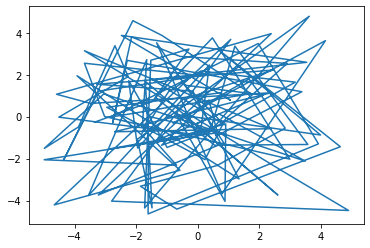

In [8]:
verify(travel_list,df)

In [6]:
travel_list

[5135,
 8562,
 433,
 9546,
 6104,
 9653,
 5933,
 1455,
 1372,
 5719,
 557,
 7544,
 6254,
 951,
 6097,
 3613,
 5356,
 8525,
 8287,
 613,
 3914,
 7560,
 7064,
 5610,
 4789,
 4287,
 487,
 5971,
 7595,
 3516,
 8375,
 3605,
 4696,
 3193,
 1447,
 7494,
 7531,
 8125,
 2,
 9241,
 9881,
 4610,
 8436,
 8469,
 781,
 1966,
 7087,
 7265,
 3026,
 4906,
 9378,
 6317,
 7583,
 3340,
 3971,
 839,
 6535,
 2639,
 58,
 5155,
 3466,
 4499,
 6478,
 9779,
 1757,
 7689,
 5296,
 5622,
 6759,
 7074,
 5562,
 3005,
 8690,
 1844,
 6375,
 865,
 6216,
 4422,
 7772,
 517,
 670,
 2346,
 4234,
 3297,
 7665,
 1684,
 6740,
 5563,
 2458,
 1976,
 3798,
 6281,
 2331,
 9049,
 359,
 8355,
 2190,
 6468,
 9804,
 2243,
 9880,
 7907,
 5381,
 4492,
 488,
 2028,
 2226,
 8477,
 4807,
 1860,
 9736,
 7801,
 4762,
 4627,
 8503,
 6528,
 2344,
 9195]